# Unit 5 - Financial Planning


In [178]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [179]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [180]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [181]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [182]:
#Fetch current BTC Price
response_data = requests.get(btc_url).json()
#print(json.dumps(response_data, indent = 4))
btc_price = response_data['data']['1']['quotes']['USD']['price']
#btc_price

In [183]:
# Fetch current ETH price
response_data = requests.get(eth_url).json()
print(json.dumps(response_data, indent = 4))
eth_price = response_data['data']['1027']['quotes']['USD']['price']
#eth_price

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113194407,
            "total_supply": 113194407,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 384.97,
                    "volume_24h": 11950153817,
                    "market_cap": 43640496963,
                    "percentage_change_1h": -0.600971280634144,
                    "percentage_change_24h": -5.63993222565529,
                    "percentage_change_7d": 4.54800772623009,
                    "percent_change_1h": -0.600971280634144,
                    "percent_change_24h": -5.63993222565529,
                    "percent_change_7d": 4.54800772623009
                },
                "CAD": {
                    "price": 512.664549,
                    "volume_24h": 15914019838.0989,
                  

In [184]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15736.30
The current value of your 5.3 ETH is $2040.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [185]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [186]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [187]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-26 00:00:00-04:00  117.65  117.72  117.59  117.64  4537207  342.13   

                                                              
                             high     low    close    volume  
2020-10-26 00:00:00-04:00  342.98  335.62  339.415  79491839

In [188]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $339.415


In [189]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23528.00
The current value of your 50 SPY shares is $16970.75


### Savings Health Analysis

In [190]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame([
       [my_btc_value + my_eth_value],
       [my_agg_value + my_spy_value]],
    index = ["Crypto", "Shares"],
    columns = ["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,17776.637
Shares,40498.750


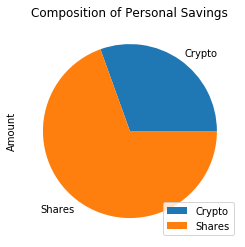

In [191]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title = "Composition of Personal Savings").legend(loc="lower right")

In [192]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Amount']['Crypto'] + df_savings['Amount']['Shares']

# Validate saving health
if total_savings == emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
else:
    print(f"Your emergency fund is ${emergency_fund - total_savings} shy of your goal. Keep saving!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [193]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-26', tz='America/New_York').isoformat()

In [196]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-10-26 00:00:00-04:00  109.85  109.90  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.46  109.1536  109.44  3485420.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-10-26 00:00:00-04:00  207.30  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  206.20  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  206.97  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  208.34  209.27  208.21  208.87   64052955  
2015-10-30 00:00:00-04:00  209.06  209.44  207.83  207.85   91063424

In [200]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_spy_agg = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [201]:
# Printing the simulation input data
mc_spy_agg.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-10-26 00:00:00-04:00  109.85  109.90  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.46  109.1536  109.44  3485420.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-26 00:00:00-04:00          NaN  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   
2015-10-30 00:00:00-04:00     0.002565  209.06  209.44  207.83  207.85   

                                                   
                              volume daily_return  
2015-10-26 00:00:00-04:00   51484043          NaN  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431  
2015-10-30 00:00:00-04:00   91063424    -0.004883

In [203]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003509,0.991317,0.995374,0.989762,1.001053,1.003258,1.002246,0.998826,0.984500,0.994218,...,0.992800,1.001033,0.995341,1.010292,1.012940,0.999450,1.002959,0.999114,1.001019,0.991014
2,1.005759,0.977888,1.002805,0.993966,1.001936,0.998364,1.004080,0.999313,0.973073,0.995054,...,1.000071,1.010912,1.008703,1.011836,1.012285,0.995870,0.997977,0.993877,1.004679,0.986336
3,1.007185,0.965441,1.001665,1.013829,1.005077,0.999100,0.978742,0.998125,0.982493,0.995455,...,1.010240,1.023418,1.005763,1.014818,1.009154,1.005448,0.997360,0.996370,1.002965,0.992686
4,1.009540,0.964069,1.019049,1.023960,1.009533,1.004820,0.979933,1.007037,0.984664,1.003842,...,1.008674,1.027042,0.996807,1.010604,1.013748,1.002179,0.998151,0.999227,0.999552,0.974247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.144299,8.732129,13.355735,4.881472,13.049091,5.939590,5.153891,11.440369,13.943923,5.316203,...,11.065532,3.578466,8.007261,1.386296,14.370395,5.903585,11.572909,10.312281,11.102279,10.048777
7557,14.195616,8.721686,13.235957,4.890988,13.167403,5.940791,5.156215,11.389753,14.125078,5.343098,...,11.200886,3.598498,8.078197,1.387663,14.461853,5.861051,11.630247,10.268611,11.115562,10.140087
7558,14.420100,8.768301,13.243716,4.919375,13.356132,5.985607,5.099114,11.458313,14.244316,5.387736,...,11.263588,3.605413,8.088456,1.382851,14.387955,5.829897,11.487567,10.267634,11.060859,10.154342
7559,14.546118,8.715766,13.162335,4.916589,13.448552,5.991521,5.076287,11.614651,14.306716,5.388406,...,11.365003,3.609152,8.016841,1.372546,14.358777,5.815229,11.391806,10.165533,11.090882,10.055856


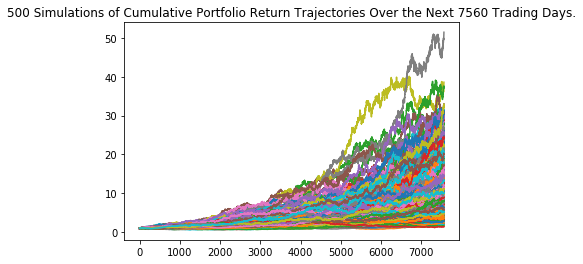

In [204]:
# Plot simulation outcomes
line_plot = mc_spy_agg.plot_simulation()

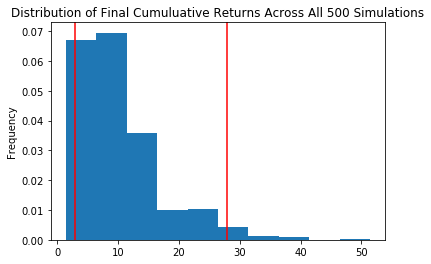

In [205]:
# Plot probability distribution and confidence intervals
dist_plot = mc_spy_agg.plot_distribution()

### Retirement Analysis

In [207]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_mcs = mc_spy_agg.summarize_cumulative_return()

# Print summary statistics
print(summary_mcs)

count           500.000000
mean             10.298326
std               6.689584
min               1.376315
25%               5.596281
50%               8.541711
75%              12.957101
max              51.446862
95% CI Lower      2.880584
95% CI Upper     27.858820
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [210]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(summary_mcs[8]*initial_investment,2)
portfolio_ci_upper = round(summary_mcs[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57611.68 and $557176.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [224]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
portfolio_ci_lower = round(summary_mcs[8]*initial_investment,2)
portfolio_ci_upper = round(summary_mcs[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86417.52 and $835764.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [217]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_spy_agg_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

mc_spy_agg_5.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-10-26 00:00:00-04:00  109.85  109.90  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.46  109.1536  109.44  3485420.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-26 00:00:00-04:00          NaN  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   
2015-10-30 00:00:00-04:00     0.002565  209.06  209.44  207.83  207.85   

                                                   
                              volume daily_return  
2015-10-26 00:00:00-04:00   51484043          NaN  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431  
2015-10-30 00:00:00-04:00   91063424    -0.004883

In [219]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_spy_agg_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002214,0.996295,0.995987,0.996565,1.005005,0.993413,0.999326,1.003129,1.000913,0.996011,...,0.997537,0.992749,1.005860,1.005475,0.997542,1.008215,0.994600,1.006834,0.992802,1.009572
2,1.014793,0.994674,0.992934,0.990951,0.994674,0.993930,0.998734,1.008049,1.004324,1.000509,...,0.996397,0.996240,1.003569,1.003285,0.998859,1.011618,0.989455,1.013379,1.002027,1.012794
3,1.014515,0.985215,1.001760,0.980303,1.004168,0.970234,0.995884,0.996633,1.019820,1.021599,...,1.000390,0.993873,1.000812,1.017524,1.000678,1.016053,0.989530,1.022560,0.996998,1.016597
4,1.014153,0.995142,1.009611,0.994382,1.002410,0.962946,0.996350,0.999584,1.011784,1.024852,...,1.014983,0.996702,1.001402,1.018525,1.007723,1.026586,0.984618,1.035002,1.002212,1.015551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.852700,1.574553,1.637654,1.856385,1.330692,1.334285,1.468637,2.180211,1.415201,0.760695,...,1.694580,1.211105,1.861069,1.035403,1.281984,1.726191,1.358714,1.042505,2.013738,1.377036
1257,1.850194,1.568876,1.637919,1.850310,1.342954,1.351844,1.478558,2.181238,1.398521,0.756757,...,1.697881,1.212477,1.851026,1.030316,1.270433,1.748450,1.342462,1.042082,1.993053,1.366122
1258,1.853727,1.587865,1.654681,1.876924,1.337658,1.365951,1.476804,2.178390,1.409626,0.751975,...,1.685049,1.205597,1.845525,1.027057,1.272396,1.738904,1.331930,1.039347,1.988035,1.367680
1259,1.873568,1.578667,1.663848,1.871304,1.334903,1.359125,1.461653,2.163463,1.398433,0.756040,...,1.692238,1.205867,1.842488,1.027827,1.267405,1.736745,1.331127,1.049680,2.005554,1.385863


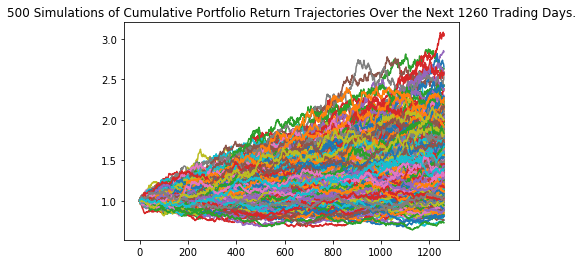

In [220]:
# Plot simulation outcomes
line_plot5 = mc_spy_agg_5.plot_simulation()

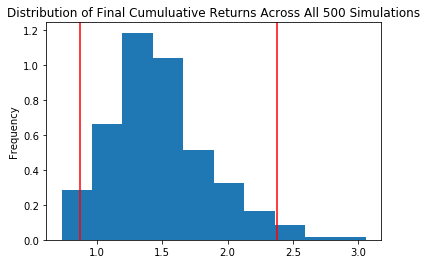

In [221]:
# Plot probability distribution and confidence intervals
dist_plot5 = mc_spy_agg_5.plot_distribution()

In [222]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_mcs5 = mc_spy_agg_5.summarize_cumulative_return()

# Print summary statistics
print(summary_mcs5)

count           500.000000
mean              1.485030
std               0.379797
min               0.728995
25%               1.225154
50%               1.431146
75%               1.689806
max               3.058848
95% CI Lower      0.868535
95% CI Upper      2.377264
Name: 1260, dtype: float64


In [226]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
portfolio_ci_lower_five = round(summary_mcs5[8]*initial_investment,2)
portfolio_ci_upper_five = round(summary_mcs5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portfolio_ci_lower_five} and ${portfolio_ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17370.69 and $47545.28


### Ten Years Retirement Option

In [227]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_spy_agg_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

mc_spy_agg_10.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-10-26 00:00:00-04:00  109.85  109.90  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.46  109.1536  109.44  3485420.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-26 00:00:00-04:00          NaN  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   
2015-10-30 00:00:00-04:00     0.002565  209.06  209.44  207.83  207.85   

                                                   
                              volume daily_return  
2015-10-26 00:00:00-04:00   51484043          NaN  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431  
2015-10-30 00:00:00-04:00   91063424    -0.004883

In [228]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_spy_agg_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011271,1.003301,1.008130,0.999095,1.004417,1.004627,0.997580,1.003097,1.006317,1.013214,...,0.993554,1.005658,1.004317,0.997240,1.004944,1.003874,0.996130,0.998298,1.007876,0.985902
2,1.001900,1.002719,1.007686,0.999543,1.009905,1.008463,0.985906,1.003795,1.004017,1.008387,...,0.987561,1.003327,1.016400,0.998453,1.015465,1.014344,0.990114,0.990935,1.012414,0.982289
3,0.998396,1.006010,0.993610,1.007999,1.004964,1.015086,0.979290,1.003169,1.005622,1.004996,...,0.990666,0.993163,1.006600,1.000853,1.010538,1.027382,0.986745,0.986180,1.001037,0.978347
4,0.988859,0.997251,1.001495,1.001626,1.004060,1.008454,0.964672,1.011086,1.004127,0.994985,...,0.991131,1.006570,1.014354,0.993116,1.012676,1.029755,0.994749,0.999454,1.002735,0.976910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.877855,2.060988,4.580881,2.449186,1.747575,1.204811,0.984362,1.059572,2.201568,2.259869,...,1.348658,2.117691,1.800953,1.731027,1.823745,5.881232,3.738727,2.974224,1.832511,0.700671
2517,1.858759,2.056969,4.601512,2.470298,1.740146,1.215730,0.983211,1.066815,2.197978,2.255373,...,1.358711,2.123302,1.804368,1.755081,1.823946,5.912712,3.745145,2.996611,1.829494,0.700329
2518,1.871890,2.033991,4.654650,2.463286,1.734604,1.210368,0.985649,1.085288,2.179595,2.250917,...,1.361103,2.106296,1.809996,1.737504,1.816187,5.867223,3.758809,2.983002,1.822316,0.696588
2519,1.864494,2.040723,4.645656,2.481622,1.742194,1.219807,0.986858,1.092948,2.198164,2.236029,...,1.352185,2.110855,1.836745,1.736680,1.819168,5.885979,3.781357,2.987081,1.807071,0.693487


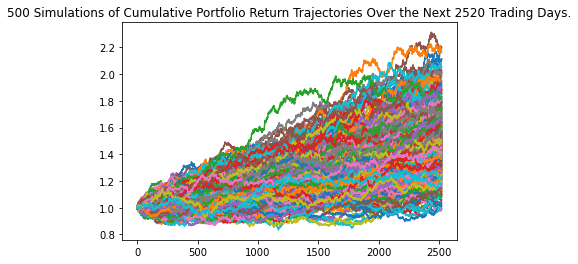

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

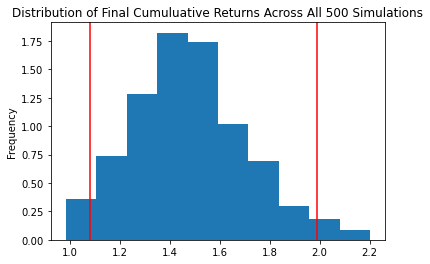

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
portfolio_ci_lower_ten = round(summary_mcs5[8]*initial_investment,2)
portfolio_ci_upper_ten = round(summary_mcs5[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_ci_lower_ten} and ${portfolio_ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
